In [58]:
import requests
import pandas as pd
from pprint import pprint
import re

movies = ["tt0381061", "tt0482571", "tt1232829", "tt1853728", "tt0993846", "tt0314331", "tt0362227", "tt0446029", "tt1631867","tt0841032",
"tt0266543",
"tt0371746",
"tt1219827",
"tt0317919",
"tt0373889",
"tt0488120",
"tt0414993",
"tt0325980",
"tt0367882",
"tt0337978",
"tt0371746",
"tt0482571",
"tt0417741",
"tt0253474",
"tt0362227",
"tt0480249",
"tt0328107",
"tt0383574",
"tt0414055",
"tt0458481",
"tt0338013",
"tt0286716",
"tt0253474",
"tt0362227",
"tt0417741",
"tt0371746",
"tt0482571",
"tt0327056",
"tt0266543",
"tt0465234",
"tt0246578",
"tt0372784",
"tt0496806",
"tt0325980",
"tt0264464",
"tt0405422",
"tt0480249",
"tt0414852",
"tt0330373",
"tt0365748",
"tt0363163",
"tt0417741",
"tt0332452",
"tt0278504",
"tt0480249",
"tt0372183",
"tt0289879",
"tt0422295",
"tt0382932",
"tt0449088",
"tt0371746",
"tt0405422",
"tt1210819",
"tt0780653",
"tt0413300",
"tt0816692",
"tt0329691",
"tt0417741",
"tt0482571",
"tt0338013",
"tt0325980",
"tt0413300",
"tt0482571",
"tt0371246",
"tt0245429",
"tt0363163",
"tt0330373",
"tt0399295",
"tt0467406",
"tt0425210",
"tt0371746",
"tt1232829",
"tt0399295",
"tt0489099",
"tt0362227",
"tt0328107",
"tt0405422",
"tt0299930",
"tt0417741",
"tt0275847",
"tt0330373",
"tt0241527",
"tt0379786",
"tt0480249",
"tt0289879",
"tt0362227",
"tt0411008",
"tt0397313",
"tt0295297",
"tt0275847",
"tt0347149",
"tt0477348",
"tt0259711",
"tt0405508",
"tt0371746",
"tt0286716",
"tt0486655",
"tt0362227",
"tt0328107",
"tt0249462",
"tt0245429",
"tt0371746",
"tt0289879",
"tt0322259",
"tt0259711",
"tt0290334",
"tt0333766",
"tt0265086",
"tt0388795",
"tt0362227",
"tt0245429",
"tt0482571",
"tt0362165",
"tt0298148",
"tt0414993",
"tt0381707",
"tt0373889",
"tt0328107",
"tt0478087",
"tt0448124",
"tt0266543",
"tt0371746",
"tt0405422",
"tt0482571",
"tt0848228",
"tt1232829",
"tt1528100",
"tt1895587",
"tt2076822",
"tt2278388",
"tt0266543",
"tt0361862",
"tt0405159",
"tt0482571",
"tt0498399",
"tt0770828",
"tt0905372",
"tt1170358",
"tt1216475",
"tt1838556",
"tt0289879",
"tt0499448",
"tt0325710",
"tt0413267",
"tt0362478",
"tt0482571",
"tt0332452",
"tt0448124",
"tt0401855",
"tt0373889",
"tt0313542",
"tt0277296",
"tt0259324",
"tt0372784",
"tt0382932",
"tt0246578",
"tt0405422",
"tt0338013",
"tt0246578",
"tt0322259",
"tt0338013",
"tt0299977",
"tt0413300",
"tt0482571",
"tt0363771",
"tt0383574",
"tt0258463",
"tt0327056",
"tt0371746",
"tt0429589",
"tt0371746",
"tt0246578",
"tt1219289",
"tt0383574",
"tt0405422",
"tt0413300",
"tt0314331",
"tt0480249",
"tt0417741",
"tt0264464",
"tt0278504",
"tt0482571",
"tt0371746",
"tt0332452",
"tt0241527",
"tt0372784",
"tt0362227",
"tt0405508",
"tt0448134",
"tt0462396"]
movie_data = []

url = "https://movie-database-alternative.p.rapidapi.com/"

headers = {
    "X-RapidAPI-Key": "a4c36db604mshfaaecf2d62e6204p1a358bjsnc66f026fcfe4",
    "X-RapidAPI-Host": "movie-database-alternative.p.rapidapi.com"
}

for movie in movies:
    querystring = {"r":"json","i":movie}

    try:
        response = requests.get(url, headers=headers, params=querystring).json()
    
        title = response['Title']
        year = response['Year']
        awards_rough = response['Awards']
        ratings_rough = response['Ratings']

        box_office = response['BoxOffice']
        box_office = box_office.replace("$", "")
        box_office = box_office.replace(",", "")
        box_office = float(box_office)

        runtime = response['Runtime']
        temp = runtime.split(" min")
        runtime = int(temp[0])

        imdb = ratings_rough[0]['Value']
        temp = imdb.split("/")
        imdb = int(float(temp[0]) * 10)

        rotten_tomatoes = ratings_rough[1]['Value']
        temp = rotten_tomatoes.split("%")
        rotten_tomatoes = int(temp[0])

        metacritic = ratings_rough[2]['Value']
        temp = metacritic.split("/")
        metacritic = int(temp[0])
    
        nums = re.findall(r'\d+', awards_rough)
        noms = int(nums[len(nums)-1])
        if len(nums) > 1:
            wins = int(nums[len(nums)-2])
        else:
            wins = 0

        movie_data.append({"Title": title,
                        "Year": year,
                        "Runtime": runtime,
                        "Box Office": box_office,
                        "IMDb": imdb,
                        "Rotten Tomatoes": rotten_tomatoes,
                        "Metacritic": metacritic,
                        "Nominations": noms,
                        "Wins": wins,})
    except:
        print("Movie not found. Skipping...")
        pass
    
movie_data_df = pd.DataFrame(movie_data)
movie_data_df.head()

Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...


,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37


In [57]:
movie_data_df.nunique

<bound method DataFrame.nunique of                                      Title  Year  Runtime Box Office  IMDb  \
0                            Casino Royale  2006      144        NaN    80   
1                             The Prestige  2006      130    $5M-$6M    85   
2                           21 Jump Street  2012      109        NaN    72   
3                         Django Unchained  2012      165        NaN    84   
4                  The Wolf of Wall Street  2013      180        NaN    82   
..                                     ...   ...      ...        ...   ...   
189  Harry Potter and the Sorcerer's Stone  2001      152        NaN    76   
190                          Batman Begins  2005      140        NaN    82   
191                           The Terminal  2004      128    $7M-$8M    74   
192                               Sunshine  2007      107   0 to $1M    72   
193                        The Last Legion  2007      101   0 to $1M    54   

     Rotten Tomatoes  Metacr

In [3]:
movie_data_df

,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37
...,...,...,...,...,...,...,...,...,...
189,Harry Potter and the Sorcerer's Stone,2001,152,318886962.0,76,81,65,69,19
190,Batman Begins,2005,140,206863479.0,82,84,70,79,14
191,The Terminal,2004,128,77872883.0,74,61,55,8,7
192,Sunshine,2007,107,3675753.0,72,76,64,23,1


In [159]:
average_runtime = movie_data_df["Runtime"].mean()
average_boxoffice = movie_data_df["Box Office"].mean
average_wins = movie_data_df["Wins"].mean()
average_nominations = movie_data_df["Nominations"].mean()
average_Rotten_tomatoes_score = movie_data_df["Rotten Tomatoes"].mean()
average_Metacritic = movie_data_df["Metacritic"].mean()
average_IMDb = movie_data_df["IMDb"].mean()
total_movies = movie_data_df["Title"].nunique()

In [147]:
summary_movie_data = pd.DataFrame({"Total Number of Movies":total_movies,
                       "Average Runtime":average_runtime,
                       "Average Box Office": average_boxoffice, 
                       "Average Wins":average_wins,
                       "Average Nominations":average_nominations,
                       "Average Rotten Tomatoes Score":average_Rotten_tomatoes_score,
                        "Average Metacritic Scores":average_Metacritic,
                        "Average IMDb Scores": average_IMDb}, index=[1])
summary_movie_data

,Total Number of Movies,Average Runtime,Average Box Office,Average Wins,Average Nominations,Average Rotten Tomatoes Score,Average Metacritic Scores,Average IMDb Scores
1,104,125.221649,<bound method NDFrame._add_numeric_operations....,18.350515,40.180412,70.541237,65.634021,73.814433


In [154]:
import random
import matplotlib.pyplot as plt
import numpy as np

box_office_bins = [0, 50000000, 100000000,  150000000, 200000000, 250000000, 300000000,350000000, 400000000, 450000000, 500000000]
box_office_labels = ["0 to 50", "50-100", "100-150", "150M-200", "200-250",
                "250-300","300-350", "350-400", "400-450","450-500"]

In [157]:

movie_data_df['Box Office Groupings (millions)'] = pd.cut(movie_data_df['Box Office'],bins=box_office_bins, labels=box_office_labels)
movie_data_df.head()

TypeError: '<' not supported between instances of 'int' and 'str'

TypeError: 'value' must be an instance of str or bytes, not a float

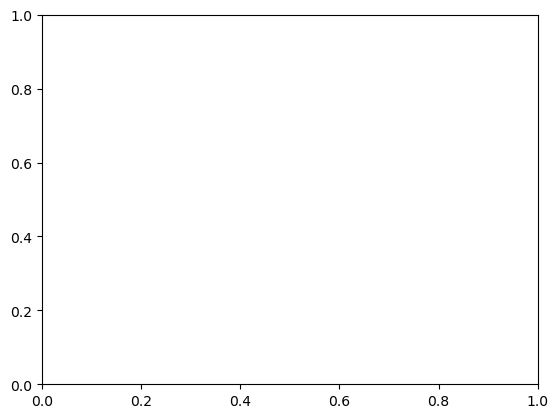

In [161]:
import matplotlib.pyplot as plt
import numpy as np

box_office = movie_data_df["Box Office"]
award_wins = movie_data_df["Wins"]

plt.bar(box_office, award_wins, color="b", align="center")

In [149]:
import matplotlib.pyplot as plt
import numpy as np

box_office_bins = [0, 50000000, 100000000,  150000000, 200000000, 250000000, 300000000,350000000, 400000000, 450000000, 500000000]
box_office_labels = ["0 to 50", "50- 100", "100-150", "150M-200", "200-250",
                "250-300","300-350", "350-400", "400-450","450-500"]
movie_data_df['Box Office Groupings (millions)'] = pd.cut(movie_data_df['Box Office'], bins=box_office_bins, labels=box_office_labels)
movie_data_df.head()

TypeError: '<' not supported between instances of 'int' and 'str'

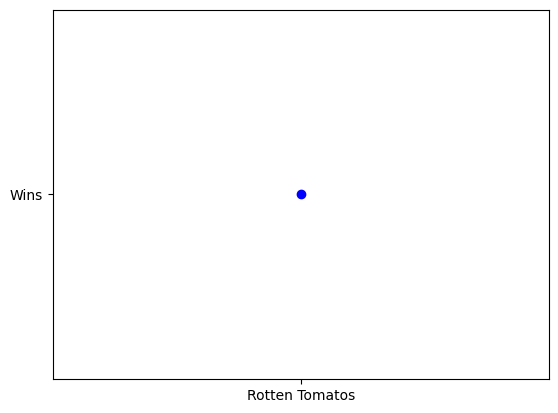

In [139]:
plt.scatter("Rotten Tomatos","Wins",marker="o", facecolors="blue")
plt.show()